# Reduced Order Modelling
## Index
- Introduction
- Finite Volumes Solution
- Analytical Solution Validation
- POD / SVD Decompositions
- ROM Solution of the same problem
- ROM Solution of a different problem

## Introduction
In this section we are going to go over the motivation to use the reduced order modelling as well as its advantages and disadvantages

When solving a transient physical problem it's often common to solve a system in the form

$$u_t(x,t) = \mathbf{N}(u, u_x, u_{xx}, ..., x, t, \beta)$$

In this case we're representing a 1D problem, but the formulation can be easily generalized to 3D configurations. Here, $\mathbf{N}$ stands for non-linear, and it's used to reinforce that our system doesn't have to be linear. Another way of representing it is by writing

$$u_t(x,t) = \mathbf{L}(u, u_x, u_{xx}, ...) + \mathbf{N}(u, u_x, u_{xx}, ..., x, t, \beta)$$

Where $\mathbf{L}$ represents the linear terms. Depending on how dominant the linear terms are, the eigenfunctions of $\mathbf{L}$ can be later used as basis modes. 


Typical schemes for solving complex physical systems, like finite differences, finite volumes and finite elements are able to solve differential equations very precisely by artificially raising the dimensionality of the problem in order to facilitate the solution. Since the solutions aren't random, but rather have coherent structures behind them, we can lower the dimensionality enforced in the discretization.

In a finite differences scheme for example, using $u_k(t) = u(k\Delta x, t)$ we can represent 
$$\begin{array}{|c|c|c|}
\hline
u_{k,x} = \frac{1}{2\Delta x} (u_{k+1}-u_{k-1}) & 
u_{k,xx} = \frac{1}{\Delta x^{2}} (u_{k+1} -2u_{k} +u_{k-1}) &
...\\
\hline
\end{array}$$

And therefore

$$u_{k,t}(t) = \mathbf{N}(u_1, u_2, \dots, t, \beta)$$

Which is an artificial dimensionality increment.

Another popular technique used when solving problems analytically is the separation of variables, which consists in representing our variable of intrest in the form

$$u(x,t) = \psi(x) a(t)$$

Or much more commonly

$$u(x,t) = \sum _{i=1}^{r} \psi_i(x) a_i(t)$$

And using the matrix representation


$$
\begin{array}{ l c c l }
\Psi =\begin{bmatrix}
\vdots  & \vdots  &  & \vdots \\
\underline{\psi }_{1}( x) & \underline{\psi }_{2}( x) & \dotsc  & \underline{\psi }_{r}( x)\\
\vdots  & \vdots  &  & \vdots 
\end{bmatrix} &  &  & A=\begin{bmatrix}
\dotsc  & \underline{a}_{1}( t) & \dotsc \\
\dotsc  & \underline{a}_{2}( t) & \dotsc \\
 & \vdots  & \\
\dotsc  & \underline{a}_{r}( t) & \dotsc 
\end{bmatrix}\\
U=\begin{bmatrix}
\vdots  & \vdots  &  & \vdots \\
\mathbf{u} (x,t_{1} ) & \mathbf{u} (x,t_{2} ) & \dotsc  & \mathbf{u} (x,t_{m} )\\
\vdots  & \vdots  &  & \vdots 
\end{bmatrix} &  &  & U=\begin{bmatrix}
\dotsc  & \mathbf{u} (x_{1} ,t) & \dotsc \\
\dotsc  & \mathbf{u} (x_{2} ,t) & \dotsc \\
 & \vdots  & \\
\dotsc  & \mathbf{u} (x_{n} ,t) & \dotsc 
\end{bmatrix}
\end{array} \\
U=\begin{bmatrix}
u( x_{1} ,t_{1}) & u( x_{1} ,t_{2}) & \dotsc  & u( x_{1} ,t_{m})\\
u( x_{2} ,t_{1}) & u( x_{2} ,t_{2}) & \dotsc  & u( x_{2} ,t_{m})\\
\vdots  & \vdots  & \ddots  & \vdots \\
u( x_{n} ,t_{1}) & u( x_{n} ,t_{2}) & \dotsc  & u( x_{n} ,t_{m})
\end{bmatrix}
$$

We can write the decomposition like

$$U = \Psi A$$

If we use an orthonormal basis $\Psi$, meaning that $\Psi \Psi^T = \mathbb{I}_{n\times n}$, $\Psi^T \Psi = \mathbb{I}_{r\times r}$, and $\left< \psi _{i} ,\psi _{j} \right> =\delta _{ij}$ where 
$$\left< \psi _{i} ,\psi _{j} \right> =\int\limits _{0}^{L} \psi _{i}( x) \ \psi _{j}^{*}( x) \ dx,$$
then we can take the inner product in both sides of the non-linear dynamic system equation substituting the separation of variables

$$\sum _{i=1}^{r} \psi _{i} (x)a_{i,t} (t)=\mathbf{N}\left(\sum _{i=1}^{r} \psi _{i} (x)a_{i} (t),\sum _{i=1}^{r} \psi _{i,x} (x)a_{i} (t),\sum _{i=1}^{r} \psi _{i,xx} (x)a_{i} (t),...,x,t,\beta \right)\\
a_{k,t} (t)=\left< \psi _{k} (x), \mathbf{N}\left(\sum _{i=1}^{r} \psi _{i} (x)a_{i} (t),\sum _{i=1}^{r} \psi _{i,x} (x)a_{i} (t),\sum _{i=1}^{r} \psi _{i,xx} (x)a_{i} (t),...,x,t,\beta \right) \right>$$

And just like the discretiation in space yielded a system of $n$ non-linear equations which were more managable, but increased the dimensionality of our problem, the separation of variables also yields a system of $r$ non-linear equations in $a_i(t)$ which are more managable, with the difference that we can chose different $\psi_i(x)$ to improve our solution. Furthermore, using a data-driven approach we can use the best set of basis $\Psi$ for a given problem based on previous simulations or even experiment measurements.

The idea behind the reduced order modelling is that our physical model produces not random results, but rather structured patterns that can reduce the order of our modelling depending on the set of chosen basis. Optimally we are looking for $r \ll n$.

Later we'll learn how to chose this set of basis using the SVD decomposition.

## Finite Volumes Solution
In this section we are going to derive the physical model equations as well as its finite volumes discretization.
Then we're gonna solve the problem and plot the results

### Physical Problem Enunciation
We're considering the heat conduction over a solid wire which is commonly represented by
$$k\nabla^2 u = \rho c_p \frac{\partial u}{\partial t}$$
Since we're going to solve it using the finite volumes method it's relevant to show how this equation is derived.

We start from the first law of thermodynamics, the conservation of energy
$$\frac{dE}{dt} = \dot{Q}_{in} - \dot{W}_{out}$$
Where $E$ represents the internal energy, $Q_{in}$ the heat entering the system and $W_{out}$ the work performed by the system. Since we're considering heat condution over a solid body no work is performed. Since the change in internal energy for a solid body at constant pressure can be given by $m c_p \Delta u$, the equation assumes the form
$$mc_{p}\frac{\partial u}{\partial t} = -\iint\limits _{\Gamma_i}\mathbf{q} ''\cdotp \mathbf{\hat{n}} \ d\Gamma_i$$
Where $\mathbf{q}''$ is the heat flow rate through the boundaries of the control volume, $m$ is the mass of the control volume and $u$ is the temperature. Using the divergence theorem for the surface integral, applying the limit for an infinitely small control volume, and using the Fourier's law which states $\mathbf{q}'' = -k\mathbf{\nabla} u$, we arrive at
$$
\iiint\limits_{\Omega_i} \rho c_{p}\frac{\partial u}{\partial t} d\Omega_i = -\iiint\limits _{\Omega_i} \nabla \cdot \mathbf{q}'' d\Omega_i \\
\rho c_p \frac{\partial u}{\partial t} = k \nabla^2 u$$
Which writing in terms of the thermal diffusivity $\alpha = \frac{k}{\rho c_p}$ we get
$$u_t = \alpha \nabla^2 u$$
And simplifying the equation for one dimension we have the final form of the equation
$$u_t = \alpha u_{xx}$$

### Finite Volumes Discretization
Although we have just written a very consise equation for our problem, which could be very well discretized using a finite differences scheme, but it's more 'physical' to go back a few steps in order to model the heat flux at the boundaries, and be able to implement a Neumann boundary condition.
$$mc_{p}u_t = -\iint\limits _{\Gamma_i} \mathbf{q}'' \cdotp \mathbf{\hat{n}} \ d\Gamma_i \\
(\rho \Delta x A) c_{p}u_t = q''_{in}A_{in} - q''_{out}A_{out}$$
And since $A = A_{in} = A_{out}$, $\alpha = \frac{k}{\rho c_p}$ and $q'' = -k u_x$
$$\frac{u_i -u_i^{old}}{\Delta t} =\frac{\alpha }{\Delta x} (\underbrace{\frac{u_{i+1} -u_{i}}{\Delta x}}_{-q''_{out} /k} -\underbrace{\frac{u_{i} -u_{i-1}}{\Delta x}}_{-q''_{in} /k} )\\
\left(\frac{1}{\Delta t} +\frac{2\alpha }{\Delta x^{2}}\right) u_{i} -\frac{\alpha }{\Delta x^{2}}( u_{i+1} +u_{i-1}) =\frac{u_{i}^{old}}{\Delta t}$$
Which can be solved using a linear system of equations in the form
$$A\mathbf{u} = \mathbf{b}$$

In [ ]:
import numpy as np
from matplotlib import pyplot as plt, ticker as mtick

In [ ]:
L = 1                                                       # Length of the domain
N = 200                                                     # Number of spatial discretization points
x = np.linspace(0,L,N)                                      # Spatial domain
dx = x[1]-x[0]                                              # Spatial discretization

In [ ]:
dt = 25                                                     # Time step
T = 100*dt                                                  # Simulation duration
t = np.arange(0,T,dt)                                       # Time domain

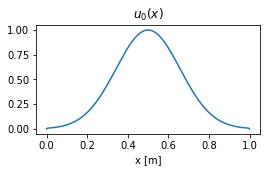

In [ ]:
# Figure 01 - Initial Distribution
plt.figure(figsize=(4,2))
alpha = 1.14e-04                                            # Thermal Diffusivity
sigma = 0.05                                                # Std. dev. of initial distribution
u0 = np.exp(-(x-L/2)**2/sigma); u0[0]=0; u0[-1]=0           # Initial Distribution
plt.plot(x,u0); plt.title(r"$u_0(x)$"); plt.xlabel("x [m]");

In [ ]:
# Boundary Conditions
neumann = False; dirichlet = not neumann

# Assembly of the linear system
M = np.zeros((N,N))
for i in range(1,N-1):
    M[i][i] += 1/dt + 2*alpha / (dx**2)
    M[i][i+1] -= alpha / (dx**2)
    M[i][i-1] -= alpha / (dx**2)

if neumann:
    M[0][0] += 1/dt + alpha / (dx**2)
    M[0][1] -= alpha / (dx**2)
    M[-1][-1] += 1/dt + alpha / (dx**2)
    M[-1][-2] -= alpha / (dx**2)
elif dirichlet:
    M[0] = np.zeros(N); M[0][0] = 1
    M[-1] = np.zeros(N); M[-1][-1] = 1
M_1 = np.linalg.inv(M)

# Assembly of the independent term
def ind(u_old):
    if neumann:
        return u_old/dt
    ind = u_old/dt; ind[0]=0; ind[-1]=0
    return ind

In [ ]:
# Solving the problem
U_fv = np.array([u0]).T
for _t in t[1:]:
    u = M_1 @ ind(U_fv.T[-1])
    U_fv = np.stack((*U_fv.T,u)).T
U_fv0 = U_fv.copy()

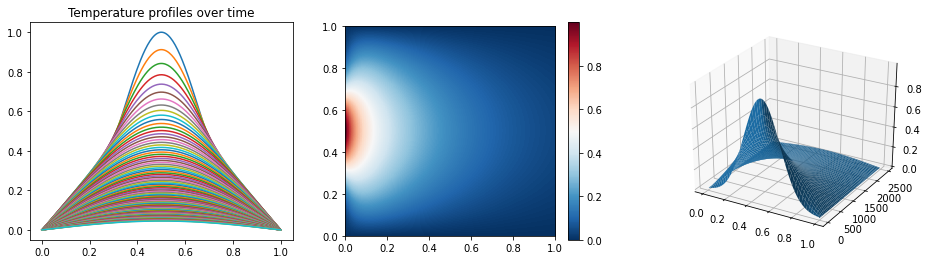

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = plt.subplot(1,3,1);
ax.set_title("Temperature profiles over time")
ax.plot(x,U_fv)
ax = plt.subplot(1,3,2);
img = ax.imshow(U_fv, cmap="RdBu_r", extent=(0,1,0,1), origin='lower')
plt.colorbar(img)
ax = plt.subplot(1,3,3,projection="3d");
ax.plot_surface(*np.meshgrid(x,t),U_fv.T);

## Analytical Solution Validation
Here we're gonna derive the analytical solution for the problem and see if our numerical solution checks out

### Derivation of Analytical Solution
We start with the equation ${u_{t}=\alpha u_{xx}}$ and assuming the separation of variables. 

$$\cases{u_{t}(x,t)=\alpha u_{xx}(x,t) \\
u(x,t)=\psi(x) a(t)} \\
\\
\psi(x) a_t(t)=\alpha \psi_{xx}(x) a(t) \\
\frac{1}{\alpha} \frac{a_t(t)}{a(t)}=\frac{\psi_{xx}(x)}{\psi(x)}=-\lambda^2$$

Since a function of $t$ is equal to a function of $x$ for any $t$ and $x$, then both must be constants, and we are reinforcing that they must be negative to ensure the convergence of the solution. We can then solve both differential equations, yielding

$$\begin{cases}
a_{t} +\alpha \lambda ^{2} a=0\\
\psi _{xx} +\lambda ^{2} \psi =0
\end{cases}\rightarrow \begin{cases}
a(t)=c_{1} e^{-\alpha \lambda ^{2} t}\\
\psi (x)=c_{2}\sin (\lambda x)
\end{cases}$$

Note that from the initial condition we had $u(0,0)=u(L,0)=0$, but to guarantee that ${u(x,t)≠0,∀t}$, we must ensure that only ${\psi(0,0)=\psi(L,0)=0}$. We have already used ${\psi(0,0)=0}$ to remove the cosine from the solution of ${\psi(x)}$, but we cannot use the second boundary condition to determine ${c_2}$. This way we are using the second boundary condition to constrain $\lambda$ such that

$$\lambda _{n} =\frac{n\pi}{L} ,\ n = 1,2,3,\dots$$

Therefore, for each ${n\in\mathbb{N}}$ we have a pair of functions ${\psi_{n}(x)}$ and ${a_{n}(t)}$, thus the solution must be a linear combination of functions that solve the PDEs. Lastly, we can represent ${u(x,t)}$ using

$$\boxed{u(x,t)=\sum _{n=1}^{\infty } c_{n}\sin \left(\frac{n\pi }{L} x\right)\ e^{-\alpha\lambda _{n}^{2} t}}$$

And we can use the initial condition ${u_{0}(x)}$ to find the ${c_{n}}$
$$u(x,0)=\sum _{n=1}^{\infty } c_{n}\sin \left(\frac{n\pi }{L} x\right)$$
Using the orthogonality of the sine function, we can apply the inner product of both sides of the equation with the sine function so that:

$$\int _{0}^{L} u(x,0)\sin \left(\frac{k\pi }{L} x\right)dx=\sum _{n=1}^{\infty } c_{n}\int _{0}^{L} \sin \left(\frac{n\pi }{L} x\right)\sin \left(\frac{k\pi }{L} x\right) dx\\
\boxed{c_{k} =\frac{2}{L}\int _{0}^{L} u(x,0)\sin \left(\frac{k\pi }{L} x\right)dx}
$$

In [ ]:
from scipy.integrate import quad                            # Used for numerical integration

In [ ]:
Nc = 150                                                    # Number of sines
c_func = lambda n: (2/L) * quad(lambda x: np.exp(-(x-L/2)**2/sigma)*np.sin(n*np.pi*x/L), 0, L)[0]
l_func = lambda n: n*np.pi/L                                    # lambda_n
c = [c_func(n) for n in range(Nc)]                              # [c1,c2,...]
l = [l_func(n) for n in range(Nc)]                              # [λ1,λ2,...]

$
u(x,t) = \sum\limits _{n=1}^{\infty} c_n \sin(\frac{n \pi}{L} x) \ e^{-\alpha\lambda_n^2 t} \\
u_t(x,t) = - \sum\limits _{n=1}^{\infty} \alpha\lambda_n^2 c_n \sin(\frac{n \pi}{L} x) \ e^{-\alpha\lambda_n^2 t} \\
u_{xx}(x,t) = - \sum\limits _{n=1}^{\infty} (\frac{n \pi}{L})^2 c_n \sin(\frac{n \pi}{L} x) \ e^{-\alpha\lambda_n^2 t}
$

In [ ]:
# Analytical u, ut and uxx
U_a = np.transpose([np.sum([c[n]*np.sin(n*np.pi*x/L)*np.exp(-alpha*l[n]**2 * _t) for n in range(Nc)],axis=0) for _t in t])
Ut_a = np.transpose([-np.sum([alpha*l[n]**2*c[n]*np.sin(n*np.pi*x/L)*np.exp(-alpha*l[n]**2 * _t) for n in range(Nc)],axis=0) for _t in t])
Uxx_a = np.transpose([-np.sum([(n*np.pi/L)**2*c[n]*np.sin(n*np.pi*x/L)*np.exp(-alpha*l[n]**2 * _t) for n in range(Nc)],axis=0) for _t in t])

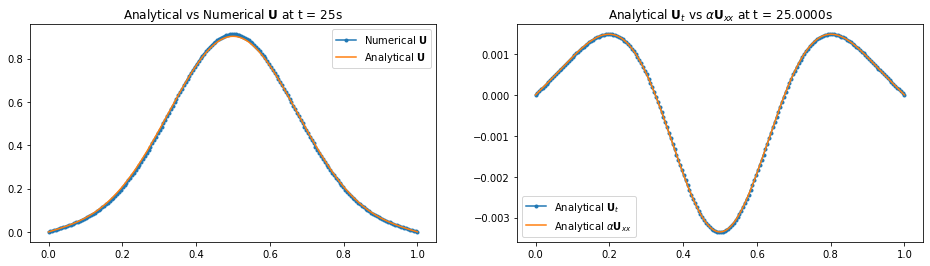

In [ ]:
# Figure 03 - Analytical Solution comparison
_ti = 1
# _ti += 1
fig, axs = plt.subplots(1,2,figsize=(16,4))
axs[0].set_title(r"Analytical vs Numerical $\mathbf{U}$ at t = %ss" % t[_ti])
axs[0].plot(x,U_fv.T[_ti],'.-',label=r"Numerical $\mathbf{U}$")
axs[0].plot(x,U_a.T[_ti],label=r"Analytical $\mathbf{U}$")
axs[0].legend()

axs[1].set_title(r"Analytical $\mathbf{U}_t$ vs $\alpha\mathbf{U}_{xx}$ at t = %.4fs" % t[_ti])
axs[1].plot(x,Ut_a.T[_ti],'.-',label=r"Analytical $\mathbf{U}_t$")
axs[1].plot(x,alpha*Uxx_a.T[_ti],label=r"Analytical $\alpha\mathbf{U}_{xx}$")
axs[1].legend();

## POD / SVD Decompositions
Here we're gonna perform the POD decomposition to extract the best basis modes for our specific problem,
and analyze the dynamics of our problem given our basis. We can also experiment with another basis set,
and check how many modes each attempt takes to acurately represent the dynamics of the problem.

### SVD
The SVD performs a decomposition of the form
$$X = \mathcal{U}\Sigma V^T$$
Such that $\mathcal{U}$ and $V$ are orthonormal, and $\Sigma$ is diagonal. The values in its diagonal are called singular values, the columns of $\mathcal{U}$ are called left singular vectors, and the columns of $V$ are called right singular values.

The eigenvectors of $XX^T$ are equal to the left singular vectors, the eigenvectors of $X^TX$ are equal to the right singular vectors, and the squares of the eigenvalues of both $XX^T$ and $X^TX$ are equal to the singular values

If $X \in \mathbb{R}^{n\times m}$, then $\mathcal{U} \in \mathbb{R}^{n\times n}$, $\Sigma \in \mathbb{R}^{n\times m}$, and $V \in \mathbb{R}^{m\times m}$, and if $n<m$ the decomposition can also be written like

$$X = \sigma_1 \mathfrak{u}_1 \circ \mathbf{v}_1 + \sigma_2 \mathfrak{u}_2 \circ \mathbf{v}_2 + \dots + \sigma_m \mathfrak{u}_m \circ \mathbf{v}_m,$$

where $\circ$ reprents the outer product, which means that actually

$$X = \hat{\mathcal{U}} \hat{\Sigma} V^T, $$

where $\hat{\mathcal{U}} \in \mathbb{R}^{n\times m}$, $\Sigma \in \mathbb{R}^{m\times m}$, and this decomposition is called the economy SVD. Notice that the vectors $\mathfrak{u}_k$ and $\mathbf{v}_k$ are sorted by importance, meaning that the first singular vectors are the most important, while the last are the least important, and this happens because the singular values are sorted from the largest to the smallest.

From this we can arrive at an important conclusion: The *best* rank $r$ approximation to $X$ is

$$X \approx \sigma_1 \mathfrak{u}_1 \circ \mathbf{v}_1 + \sigma_2 \mathfrak{u}_2 \circ \mathbf{v}_2 + \dots + \sigma_r \mathfrak{u}_r \circ \mathbf{v}_r\\
X \approx \tilde{\mathcal{U}} \tilde{\Sigma} \tilde{V}^T,$$
where $\tilde{\mathcal{U}} \in \mathbb{R}^{n\times r}$, $\tilde{\Sigma} \in \mathbb{R}^{r\times r}$ and $\tilde{V} \in \mathbb{R}^{r\times m}$.

Another important observation, is that the columnspace of $\hat{\mathcal{U}}$ is equal to the columnspace of $X$, and since $\mathcal{U}$ is orthonormal, its columnspace spans $\mathbb{R}^n$, meaning that if 
$$\mathcal{U}=\begin{bmatrix} \hat{\mathcal{U}} & \hat{\mathcal{U}}^{\perp } \end{bmatrix}$$
Then $\hat{\mathcal{U}}^\perp$ spans the orthogonal complement of the columnspace of $X$.

An important observation, is that the $k$-th singular vector reflects the standard deviation of the $k$-th component of our data in the transformed coordinates, namely $\mathcal{U}^T X$. As consequence of this, the first singular vectors will be way more important when representing our data. It is really helpful to plot the singular values, and see how rapidly they decay along the modes. If the data has low rank, they'll decay very quickly, but if our data has higher rank, the singular values will decay more slowly. When choosing the $r$ truncation of $\tilde{\mathcal{U}}_r$, it is important to take this plot into consideration.

Observation: $\mathcal{U}$ and $\mathfrak{u}$ are usually represented using $U$ and $\mathbf{u}$, but since we're already using them for temperature I decided to change the nomenclature a little bit.

### POD
Since we're trying to compute a decomposition in the form
$$U = \Psi A$$
Where $\Psi$ must be orthonormal and can be chosen, and
$$U \approx \mathcal{\tilde{U}} \tilde{\Sigma} \tilde{V}$$
provides the best rank $r$ approximation, where $\mathcal{U}$ is also orthonormal, it makes sense to choose $\Psi = \mathcal{U}$ in order to minmize the number of modes $\psi_k$ being used to represent $u(x,t)$

In [ ]:
U, s, Vt = np.linalg.svd(U_fv, False); U,Vt = -U,-Vt

Since the singular values are sorted from the largest to the smallest, we can plot their evolution in function of the SVD modes to decide which rank truncation is enough to represent our data

Text(0.5, 0, 'Modes')

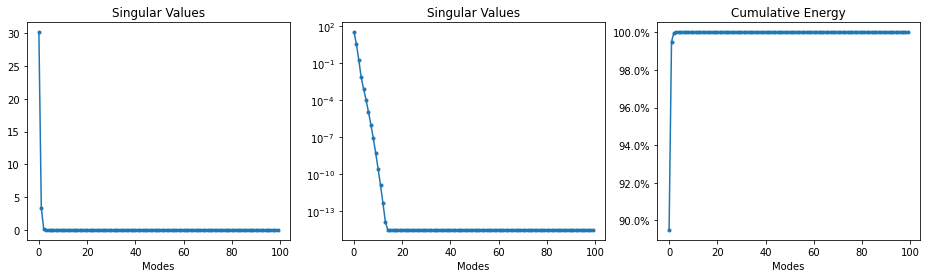

In [ ]:
# Figure 04 - Singular Values Plot
fig,axs = plt.subplots(1,3,figsize=(16,4))
axs[0].set_title("Singular Values"); axs[0].plot(s,'.-'); axs[0].set_xlabel("Modes")
axs[1].set_title("Singular Values"); axs[1].semilogy(s,'.-'); axs[1].set_xlabel("Modes")
axs[2].set_title("Cumulative Energy"); axs[2].plot(100*np.cumsum(s)/np.sum(s),'.-');
axs[2].yaxis.set_major_formatter(mtick.PercentFormatter()); axs[2].set_xlabel("Modes")

In [ ]:
for i in range(4):
    print(f"The first {i+1} modes carry {np.cumsum(s)[i]/np.sum(s):>7.3%} of the energy / variance")

The first 1 modes carry 89.499% of the energy / variance
The first 2 modes carry 99.499% of the energy / variance
The first 3 modes carry 99.978% of the energy / variance
The first 4 modes carry 99.997% of the energy / variance


Notice that in this case, first two modes carry 99.5% of the *energy*, and the first four modes carry 99.997% of the *energy* or variance of the given data. Since we are going to try and represent other data using these modes, it might be a good idea to pick a few more modes to better represent the data.

In [ ]:
r = 4
Psi = U[:,:r]

Since $\Psi^T\Psi=\mathbb{I}$ and $U = \Psi A$, then $$A = \Psi^T U$$

In [ ]:
A_fv = Psi.T @ U_fv

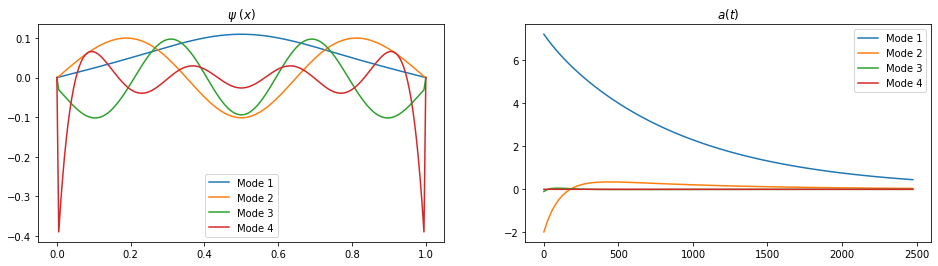

In [ ]:
# Figure 04 - POD basis modes and dynamic behaviour
fig,axs = plt.subplots(1,2,figsize=(16,4))
axs[0].plot(x,Psi); axs[0].set_title(r"$\psi\ (x)$"); axs[0].legend(list(map(lambda n:f"Mode {n}",range(1,r+1))));
axs[1].plot(t,A_fv.T); axs[1].set_title(r"$a(t)$"); axs[1].legend(list(map(lambda n:f"Mode {n}",range(1,r+1))));

### Differentiation
Notice that separation of variables can facilitate partial differentiation. For example
$$
u( x,t) =\sum _{k=1}^{r} \psi _{k}( x) a_{k}( t)\rightarrow \begin{cases}
u_{t}( x,t) =\sum \limits_k \psi _{k}( x) a_{k,t}( t)\\
u_{xx}( x,t) =\sum \limits_k \psi _{k,xx}( x) a_k( t)
\end{cases}
$$
Which means that
$$\cases{U_t = \Psi A_t \\ U_{xx} = \Psi_{xx} A}$$
Where by $U_t$, $U_{xx}$, $A_t$ and $\Psi_{xx}$ we mean

$$
\begin{array}{ l c c }
U_{t} =\begin{bmatrix}
\dotsc  & \mathbf{u}_{t} (x_{1} ,t) & \dotsc \\
\dotsc  & \mathbf{u}_{t} (x_{2} ,t) & \dotsc \\
 & \vdots  & \\
\dotsc  & \mathbf{u}_{t} (x_{n} ,t) & \dotsc 
\end{bmatrix} &  & U_{xx} =\begin{bmatrix}
\vdots  & \vdots  &  & \vdots \\
\mathbf{u}_{xx} (x,t_{1} ) & \mathbf{u}_{xx} (x,t_{2} ) & \dotsc  & \mathbf{u}_{xx} (x,t_{m} )\\
\vdots  & \vdots  &  & \vdots 
\end{bmatrix}\\
A_{t} =\begin{bmatrix}
\dotsc  & \underline{a}_{1,t} (t) & \dotsc \\
\dotsc  & \underline{a}_{2,t} (t) & \dotsc \\
 & \vdots  & \\
\dotsc  & \underline{a}_{r,t} (t) & \dotsc 
\end{bmatrix} &  & \Psi _{xx} =\begin{bmatrix}
\vdots  & \vdots  &  & \vdots \\
\underline{\psi }_{1,xx} (x) & \underline{\psi }_{2,xx} (x) & \dotsc  & \underline{\psi }_{r,xx} (x)\\
\vdots  & \vdots  &  & \vdots 
\end{bmatrix}
\end{array}
$$

In [ ]:
# Derive the columns of F
ddy = lambda F,y: np.transpose([np.gradient(f,y) for f in F.T])

In [ ]:
Psi_xx = ddy(ddy(Psi,x),x)
At_fv = ddy(A_fv.T,t).T

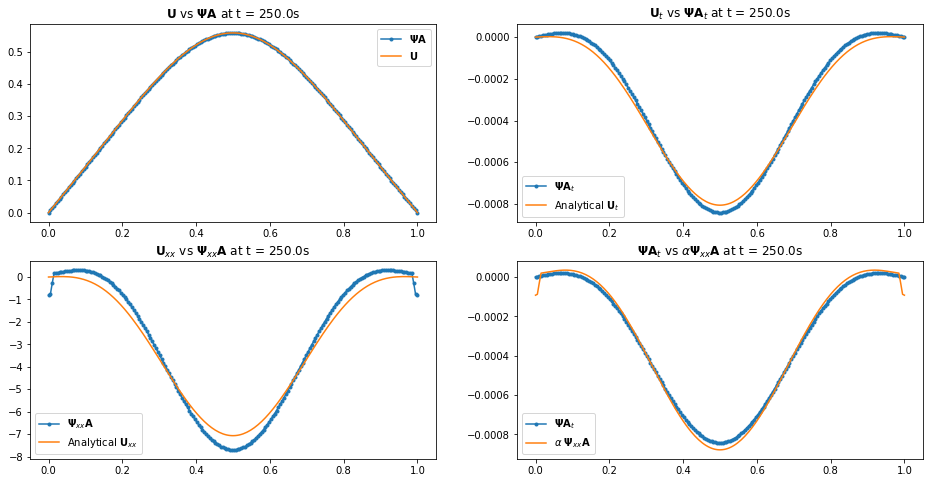

In [ ]:
# Figure 05 - POD decomposition comparison
_ti = 10
# _ti += 1
fig, axs = plt.subplots(2,2,figsize=(16,8))
axs[0][0].set_title("$\mathbf{U}$ vs $\mathbf{\Psi A}$ at t = %0.1fs"%t[_ti])
axs[0][0].plot(x,(Psi@A_fv).T[_ti],'.-',label=r"$\mathbf{\Psi A}$")
axs[0][0].plot(x,U_fv.T[_ti],label=r"$\mathbf{U}$")
axs[0][0].legend()

axs[0][1].set_title("$\mathbf{U}_t$ vs $\mathbf{\Psi} \mathbf{A}_t$ at t = %0.1fs"%t[_ti])
axs[0][1].plot(x,(Psi@At_fv).T[_ti],'.-',label=r"$\mathbf{\Psi} \mathbf{A}_t$")
axs[0][1].plot(x,Ut_a.T[_ti],label=r"Analytical $\mathbf{U}_t$")
axs[0][1].legend();

axs[1][0].set_title(r"$\mathbf{U}_{xx}$ vs $\mathbf{\Psi}_{xx} \mathbf{A}$ at t = %0.1fs"%t[_ti])
axs[1][0].plot(x,(Psi_xx@A_fv).T[_ti],'.-',label=r"$\mathbf{\Psi}_{xx} \mathbf{A}$")
axs[1][0].plot(x,Uxx_a.T[_ti],label=r"Analytical $\mathbf{U}_{xx}$")
axs[1][0].legend()

axs[1][1].set_title(r"$\mathbf{\Psi} \mathbf{A}_t$ vs $\alpha \mathbf{\Psi}_{xx} \mathbf{A}$ at t = %0.1fs"%t[_ti])
axs[1][1].plot(x,(Psi @ At_fv).T[_ti],'.-',label=r"$\mathbf{\Psi} \mathbf{A}_t$")
axs[1][1].plot(x,alpha*(Psi_xx@A_fv).T[_ti],label=r"$\alpha\ \mathbf{\Psi}_{xx} \mathbf{A}$")
axs[1][1].legend();

## ROM Solution of the same problem
Having decided our basis modes we can use them to solve our problem reducing the dimensionality of the problem.
We can time both approaches to check if there's a difference. Then we shall plot the results and comparisons.

Having chosen a basis set $\Psi$, we can solve the problem using the order reduction method derived in the introduction, which in this case is a lot simpler, since the problem is linear.



$$
\sum _{i=1}^{r} \psi _{i}( x) a_{i,t}( t) =\alpha \sum _{i=1}^{r} \psi _{i,xx}( x) a_{i}( t)\\
\sum _{i=1}^{r}\left< \psi _{k}( x) ,\psi _{i}( x)\right> a_{i,t}( t) =\alpha \sum _{i=1}^{r}\left< \psi _{k}( x) ,\psi _{i,xx}( x)\right> a_{i}( t)\\
a_{k,t}( t) =\alpha \sum _{i=1}^{r}\left< \psi _{k}( x) ,\psi _{i,xx}( x)\right> a_{i}( t)\\
\\
a_{k,t}( t) =\alpha \left< \psi _{k} ,\psi _{1,xx}\right> a_1( t) +\alpha \left< \psi _{k} ,\psi _{2,xx}\right> a_2( t) +\dotsc +\alpha \left< \psi _{k} ,\psi _{r,xx}\right> a_r( t)\\
\\
\begin{bmatrix} a_{1,t}( t)\\ a_{2,t}( t)\\ \vdots \\ a_{r,t}( t) \end{bmatrix}
= \alpha \begin{bmatrix}
	\left< \psi _1 ,\psi _{1,xx}\right>  & \left< \psi _1 ,\psi _{2,xx}\right>  & \dotsc  & \left< \psi _1 ,\psi _{r,xx}\right> \\
	\left< \psi _2 ,\psi _{1,xx}\right>  & \left< \psi _2 ,\psi _{2,xx}\right>  & \dotsc  & \left< \psi _2 ,\psi _{r,xx}\right> \\
	\vdots  & \vdots  & \ddots  & \vdots \\
	\left< \psi _r ,\psi _{1,xx}\right>  & \left< \psi _r ,\psi _{2,xx}\right>  & \dotsc  & \left< \psi _r ,\psi _{r,xx}\right> 
\end{bmatrix}
\begin{bmatrix} a_1( t)\\ a_2( t)\\ \vdots \\ a_r( t) \end{bmatrix}\\
\begin{bmatrix} a_{1,t}( t)\\ a_{2,t}( t)\\ \vdots \\ a_{r,t}( t) \end{bmatrix}
= \alpha \begin{bmatrix} \dotsc  & \psi _1 & \dotsc \\ \dotsc  & \psi _2 & \dotsc \\  & \vdots  & \\ \dotsc  & \psi _r & \dotsc \end{bmatrix}
\begin{bmatrix} \vdots  & \vdots  &  & \vdots \\ \psi _{1,xx} & \psi _{2,xx} & \dotsc  & \psi _{r,xx}\\ \vdots  & \vdots  &  & \vdots \end{bmatrix}
\begin{bmatrix} a_1( t)\\ a_2( t)\\ \vdots \\ a_r( t) \end{bmatrix}\\
\mathbf{a}_t( t) =\alpha \Psi ^{T} \Psi _{xx}\mathbf{a}_t( t)
$$
And the solution to this problem is really simple, and given by the expression
$$\mathbf{a}(t) = \exp(\alpha \Psi ^{T} \Psi _{xx} t) \mathbf{a}(0)$$
The derivation for this solution is going to be shown at the end of the section

In [ ]:
from scipy.linalg import expm 

In [ ]:
a0 = Psi.T @ u0
A_rom = np.array([a0]).T
Lm = alpha * Psi.T @ Psi_xx
d, T = np.linalg.eig(Lm); T_1 = np.linalg.inv(T); b0 = T_1 @ a0
for _t in t[1:]:
    A_rom = np.stack([*A_rom.T, T @ np.diag(np.exp(d*_t)) @ b0]).T

In [ ]:
U_rom = Psi @ A_rom

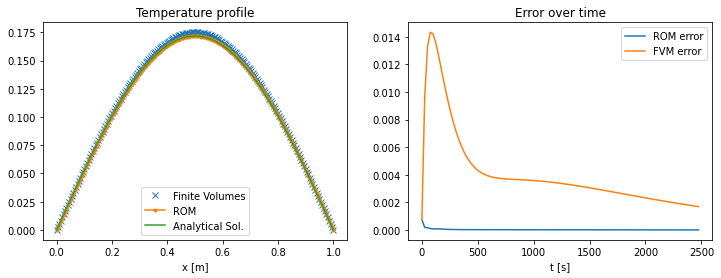

In [ ]:
_ti = 50
fig, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(x, U_fv.T[_ti], 'x', label="Finite Volumes")
axs[0].plot(x, U_rom.T[_ti], '.-', label="ROM")
axs[0].plot(x, U_a.T[_ti], label="Analytical Sol.")
axs[0].set_title("Temperature profile")
axs[0].set_xlabel("x [m]")
axs[0].legend();

rom_err = [np.max(np.abs(ua-urom)) for ua,urom in zip(U_a.T, U_rom.T)]
fv_err = [np.max(np.abs(ua-ufv)) for ua,ufv in zip(U_a.T, U_fv.T)]
axs[1].set_title("Error over time")
axs[1].plot(t, rom_err, label="ROM error")
axs[1].plot(t, fv_err, label="FVM error")
axs[1].set_xlabel("t [s]");
plt.legend();

- #### Solution to the problem $\mathbf{a}_t(t) = L \mathbf{a}(t)$

Let $L$ be a square matrix, such that its eigendecomposition is given by
$$L\mathbf{v}_i = \lambda_i \mathbf{v}_i$$
where $\mathbf{v}_i$ are its eigenvectors and $\lambda_i$ are its eigenvalues. Another way of writing this decomposition is by representing each eigenpair in a column of a matrix, in such a way that

$$
\begin{bmatrix} \vdots  & \vdots  &  & \vdots \\ L\mathbf{v}_{1} & L\mathbf{v}_{2} & \dotsc  & L\mathbf{v}_{r}\\ \vdots  & \vdots  &  & \vdots  \end{bmatrix}
 = \begin{bmatrix} \vdots  & \vdots  &  & \vdots \\ \lambda _{1}\mathbf{v}_{1} & \lambda _{2}\mathbf{v}_{2} & \dotsc  & \lambda _{r}\mathbf{v}_{r}\\ \vdots  & \vdots  &  & \vdots  \end{bmatrix} \\
 L \begin{bmatrix} \vdots  & \vdots  &  & \vdots \\ \mathbf{v}_{1} & \mathbf{v}_{2} & \dotsc  & \mathbf{v}_{r}\\ \vdots  & \vdots  &  & \vdots  \end{bmatrix}
 = \begin{bmatrix} \vdots  & \vdots  &  & \vdots \\ \mathbf{v}_{1} & \mathbf{v}_{2} & \dotsc  & \mathbf{v}_{r}\\ \vdots  & \vdots  &  & \vdots  \end{bmatrix}
 \begin{bmatrix} \lambda _{1} & 0 & 0 & 0\\ 0 & \lambda _{2} & 0 & 0\\ 0 & 0 & \ddots  & 0\\ 0 & 0 & 0 & \lambda _{r} \end{bmatrix}\\
LT=TD \\
L = T D T^{-1}\\
$$

An useful application of this representation is powers of matrix. Notice an emergent property from this decoposition

$$L^{2} =LL=TD T^{-1} TD T^{-1} =TD ^{2} T^{-1}\\
L^{3} =L^{2} L=TD ^{2} T^{-1} TD T^{-1} =TD ^{3} T^{-1}\\
\vdots \\
L^{n} =TD ^{n} T^{-1}$$

Also, since $D$ is diagonal, $D^n$ simply has the eigenvalues in its diagonal raised to the power of $n$.

Later on, we'll use the matrix exponential, which is defined by
$$e^{Lt} =\mathbb{I} +tL+\tfrac{t^{2}}{2!} L^{2} +\tfrac{t^{3}}{3!} L^{3} +...=\sum _{k=0}^{\infty }\tfrac{t^{k}}{k!} L^{k}$$
Which isn't really useful to compute the matrix exponential, but we can express $L$ in its eigendecomposition in such a way that
$$e^{Lt} =\mathbb{I} +tTD T^{-1} +\tfrac{t^{2}}{2!} TD ^{2} T^{-1} +\tfrac{t^{3}}{3!} TD ^{3} T^{-1} +...\\
e^{Lt} =T\left(\mathbb{I} +tD +\tfrac{t^{2}}{2!} D ^{2} +\tfrac{t^{3}}{3!} D ^{3} +...\right) T^{-1} =Te^{D t} T^{-1}$$
And since when raising $D$ to the power of $n$ resulted in its diagonal values raised to the power of $n$, when computing $e^{D t}$, we also only fill the diagonals with $e^{\lambda_i t}$

With that out of the way, we can finally derive the solution for the ODE
$$\mathbf{a}_{t}( t) =L\mathbf{a}( t)\\
\mathbf{a}_{t}( t) =T D T^{-1}\mathbf{a}( t)\\
T^{-1}\mathbf{a}_{t}( t) = D T^{-1}\mathbf{a}( t)\\
\begin{array}{ c c|c c }
\mathbf{b}( t) =T^{-1}\mathbf{a}( t) &  &  & \mathbf{b}_{t}( t) =T^{-1}\mathbf{a}_{t}( t)
\end{array}\\
\mathbf{b}_{t}( t) = D \mathbf{b}( t)$$
Which is a decoupled ODE, and in each row we have the equation
$$b_{i,t}(t) = \lambda_i b_i(t)$$
For which we know the solution
$$b_{i}(t) = e^{\lambda_i t} b_i(0)$$
And expressing it in the matrix form we have
$$\mathbf{b}(t) = e^{D t} \mathbf{b}(0)$$
Substituiting the definition of $\mathbf{b}(t)$ we get the solution
$$T^{-1} \mathbf{a}(t) = e^{D t} T^{-1} \mathbf{a}(0) \\
\mathbf{a}(t) = e^{L t} \mathbf{a}(0)$$

## ROM Solution of a different problem
Because the basis choice came from an POD decomposition we are guaranteed to have the best basis set to our problem,
but we haven't achieved computational savings since we had to first simulate a problem using the traditional approach.
Therefore we must simulate another scenario to try the limits of our formulation.

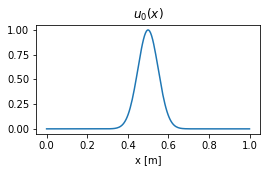

In [ ]:
plt.figure(figsize=(4,2))
sigma_2 = 0.005                                               # Std. dev. of initial distribution
u0_2 = np.exp(-(x-L/2)**2/sigma_2); u0_2[0]=0; u0_2[-1]=0           # Initial Distribution
plt.plot(x,u0_2); plt.title(r"$u_0(x)$"); plt.xlabel("x [m]");

**Analytical Solution**

In [ ]:
c_func2 = lambda n: (2/L) * quad(lambda x: np.exp(-(x-L/2)**2/sigma_2)*np.sin(n*np.pi*x/L), 0, L)[0]
l_func2 = lambda n: n*np.pi*np.sqrt(alpha)/L                     # lambda_n
c_2 = [c_func2(n) for n in range(Nc)]                              # [c1,c2,...]
l_2 = [l_func2(n) for n in range(Nc)]                              # [λ1,λ2,...]
U_a2 = np.transpose([np.sum([c_2[n]*np.sin(n*np.pi*x/L)*np.exp(-l_2[n]**2 * _t) for n in range(Nc)],axis=0) for _t in t])

**FVM Solution**

In [ ]:
U_fv2 = np.array([u0_2]).T
for _t in t[1:]:
    u = M_1 @ ind(U_fv2.T[-1])
    U_fv2 = np.stack((*U_fv2.T,u)).T

**ROM Solution**

In [ ]:
a0_2 = Psi.T @ u0_2
A_rom2 = np.array([a0]).T
b0_2 = T_1 @ a0_2
for _t in t[1:]:
    A_rom2 = np.stack([*A_rom2.T, T @ np.diag(np.exp(d*_t)) @ b0_2]).T
U_rom2 = Psi @ A_rom2

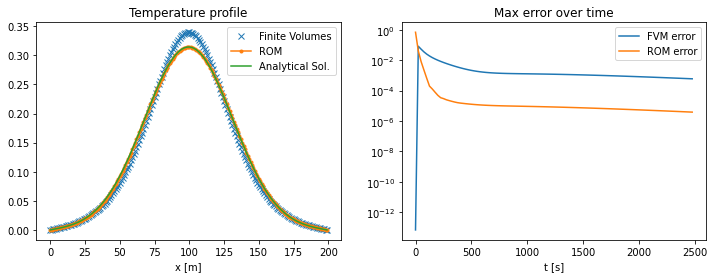

In [ ]:
_ti = 4
fig, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(U_fv2.T[_ti], 'x', label="Finite Volumes")
axs[0].plot(U_rom2.T[_ti], '.-', label="ROM")
axs[0].plot(U_a2.T[_ti], label="Analytical Sol.")
axs[0].set_title("Temperature profile")
axs[0].set_xlabel("x [m]")
axs[0].legend();

rom_err2 = [np.max(np.abs(ua-urom)) for ua,urom in zip(U_a2.T, U_rom2.T)]
fv_err2 = [np.max(np.abs(ua-ufv)) for ua,ufv in zip(U_a2.T, U_fv2.T)]
axs[1].set_title("Max error over time")
axs[1].plot(t, fv_err2, label="FVM error")
axs[1].semilogy(t, rom_err2, label="ROM error")
axs[1].set_xlabel("t [s]");
plt.legend();

As you can see, the ROM still does a pretty good job in the steady state, but at the start of the simulation we have significant errors, therefore we must increase the number of modes we're using to simulate the problem.

**ROM with more modes**

In [ ]:
Psi20 = U[:,:20]
Psi20_xx = ddy(ddy(Psi20,x),x)

a0_3 = Psi20.T @ u0_2
A_rom3 = np.array([a0_3]).T
Lm_3 = alpha * Psi20.T @ Psi20_xx
d_3, T_3 = np.linalg.eig(Lm_3); T_1_3 = np.linalg.inv(T_3); b0_3 = T_1_3 @ a0_3
for _t in t[1:]:
    A_rom3 = np.stack([*A_rom3.T, T_3 @ np.diag(np.exp(d_3*_t)) @ b0_3]).T
U_rom3 = Psi20 @ A_rom3

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


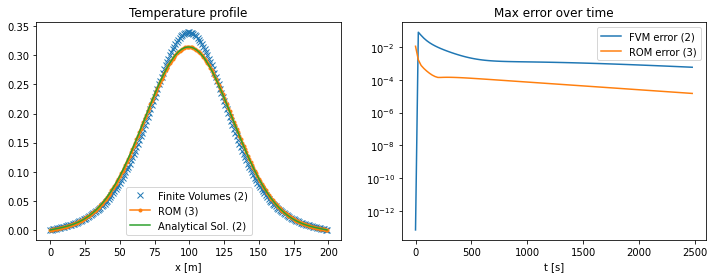

In [ ]:
_ti = 4
fig, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(U_fv2.T[_ti], 'x', label="Finite Volumes (2)")
axs[0].plot(U_rom3.T[_ti], '.-', label="ROM (3)")
axs[0].plot(U_a2.T[_ti], label="Analytical Sol. (2)")
axs[0].set_title("Temperature profile")
axs[0].set_xlabel("x [m]")
axs[0].legend();

rom_err3 = [np.max(np.abs(ua-urom)) for ua,urom in zip(U_a2.T, U_rom3.T)]
axs[1].set_title("Max error over time")
axs[1].plot(t, fv_err2, label="FVM error (2)")
axs[1].semilogy(t, rom_err3, label="ROM error (3)")
axs[1].set_xlabel("t [s]");
plt.legend();